In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as sk
%matplotlib inline

In [3]:
housing = pd.read_csv(r"C:\Users\Virani\Documents\Machine_Learning_Start\Book\Housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing2=pd.get_dummies(housing, columns=["ocean_proximity"])
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [5]:
housing2=housing2.fillna(housing2.median())

In [6]:
corr_matrix = housing2.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.017966,-0.006158,-0.004322,-0.019667,0.000557
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.017966,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [7]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'ocean_proximity_<1H OCEAN'}>,
        <AxesSubplot:title={'center':'ocean_proximity_INLAND'}>,
        <AxesSubplot:title={'center':'ocean_proximity_ISLAND'}>],
       [<AxesSubplot:title={'center':'ocean_proximity_NEAR BAY'}>,
        <AxesSubplot:title={'center':'ocean_proximity_NEAR OCEAN'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

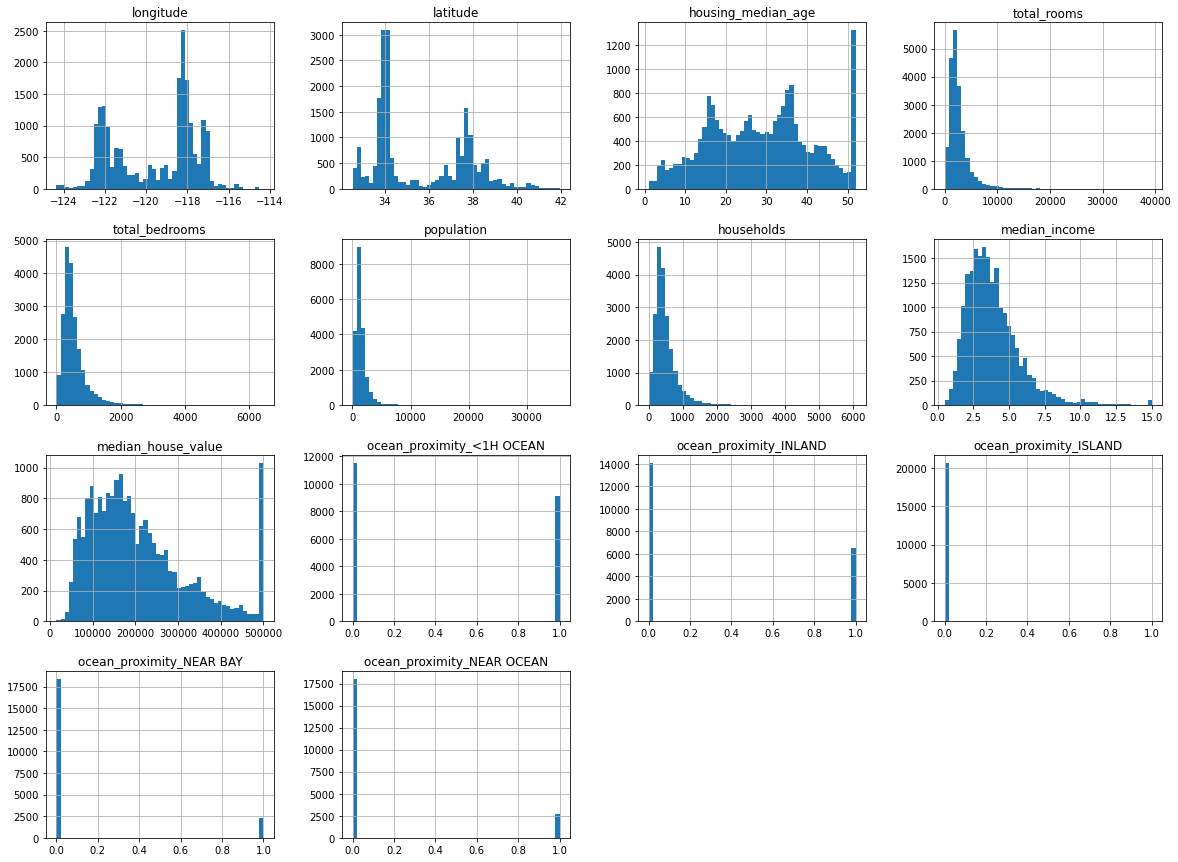

In [8]:
housing2.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='ocean_proximity_<1H OCEAN', ylabel='longitude'>,
        <AxesSubplot:xlabel='ocean_proximity_INLAND', ylabel='longitude'>,
        <AxesSubplot:xlabel='ocean_proximity_ISLAND', ylabel='longitude'>,
        <AxesSubplot:xlabel='ocean_proximity_NEAR BAY', ylabel='longitude'>,
        <AxesSubplot:xlabel='ocean_proximity_NEAR OCEAN', ylabel='longitude'>],
       [<AxesSubplot:xlabel

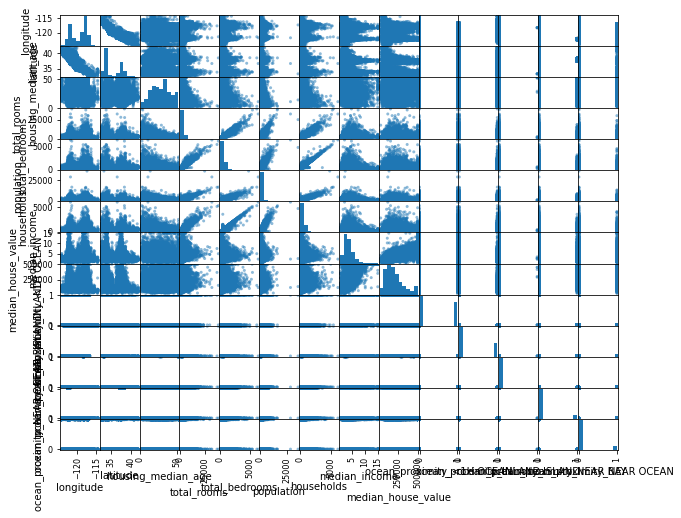

In [9]:
pd.plotting.scatter_matrix(housing2, figsize=(10,8))

In [10]:
y=housing2["median_house_value"]
x=housing2.drop(columns=["median_house_value"])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [13]:
a=reg.coef_
print(a)
reg.intercept_

[-2.68382734e+04 -2.54683520e+04  1.10218508e+03 -6.02150567e+00
  1.02789395e+02 -3.81729064e+01  4.82527528e+01  3.94739752e+04
 -1.89265829e+04 -5.87132390e+04  1.17198490e+05 -2.40632251e+04
 -1.54954428e+04]


-2256620.7988545094

In [14]:
reg.score(X_train, y_train)

0.6496648627123223

In [15]:
y_pred = reg.predict(X_test)

In [16]:
reg.score(X_test,y_test)

0.6254240620553608

In [17]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

70060.52184473517

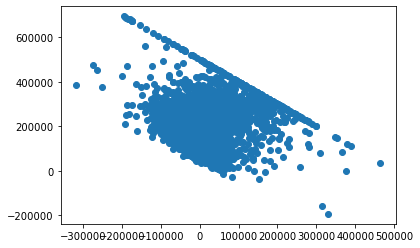

In [18]:
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)

<AxesSubplot:>

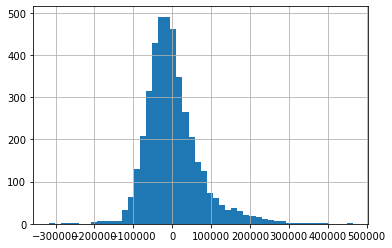

In [19]:
residuals.hist(bins=50)

In [20]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_predo = regr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predo))

49084.253297174466

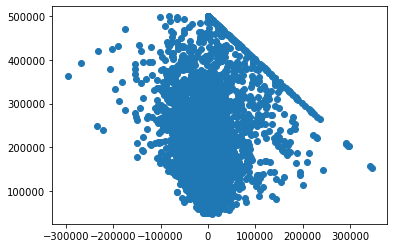

In [21]:
residual = y_test-y_predo
plt.scatter(residual,y_predo)

<AxesSubplot:>

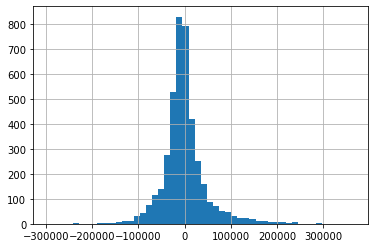

In [30]:
residual.hist(bins=50)

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_predot = regr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predot))

49084.253297174466

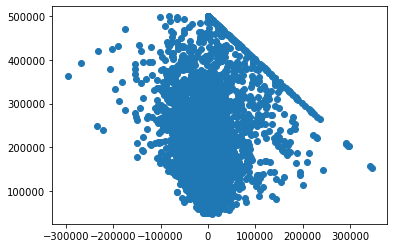

In [24]:
residal = y_test-y_predot
plt.scatter(residal,y_predot)

<AxesSubplot:>

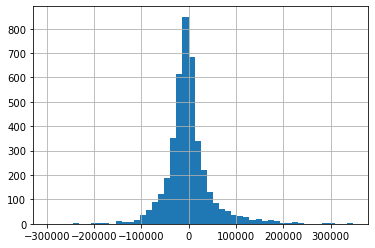

In [25]:
residal.hist(bins=50)